In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score, accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
## loading the dataset without the head
df= pd.read_csv("C:/Users/USER/Desktop/Python project/iris.data.csv", header=None)

## EDA

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## givinf each column therre names
df.columns = ['Sepal length cm','Sepal width cm','Petal length cm','Petal width cm','Species']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal length cm  150 non-null    float64
 1   Sepal width cm   150 non-null    float64
 2   Petal length cm  150 non-null    float64
 3   Petal width cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
df.isnull().sum()

Sepal length cm    0
Sepal width cm     0
Petal length cm    0
Petal width cm     0
Species            0
dtype: int64

In [8]:
df.describe()

,Sepal length cm,Sepal width cm,Petal length cm,Petal width cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
## checking the total umber of entries
len(df)

150

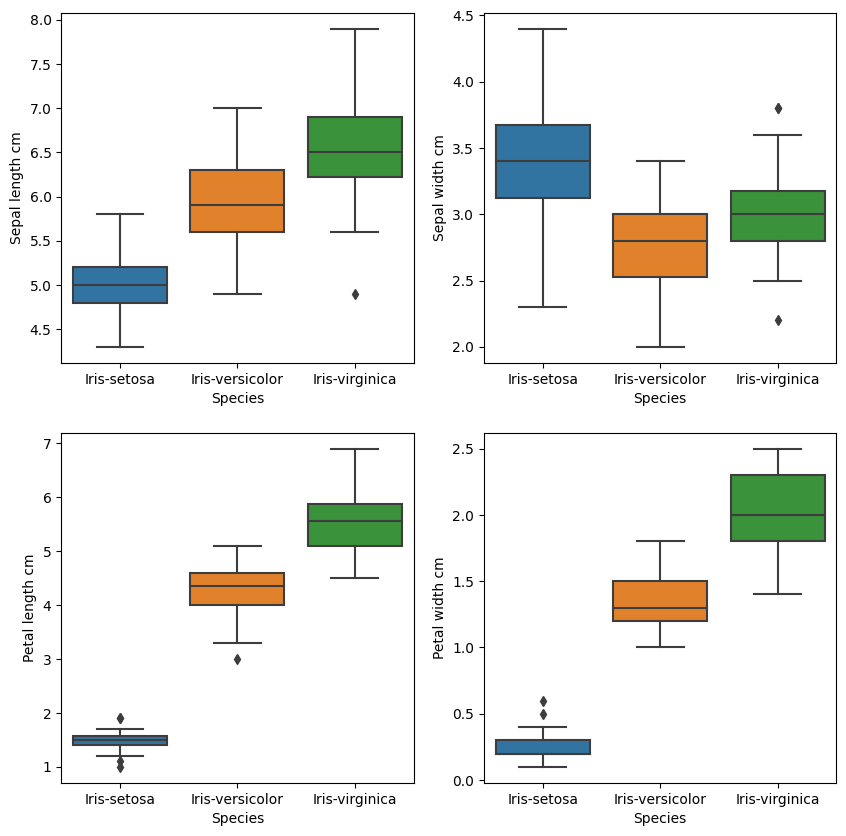

In [20]:
### checking for outliers 

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x= df['Species'], y=df['Sepal length cm'])
plt.subplot(2,2,2)
sns.boxplot(x= df['Species'], y=df['Sepal width cm'])
plt.subplot(2,2,3)
sns.boxplot(x= df['Species'], y=df['Petal length cm'])
plt.subplot(2,2,4)
sns.boxplot(x= df['Species'], y=df['Petal width cm'])
plt.show()

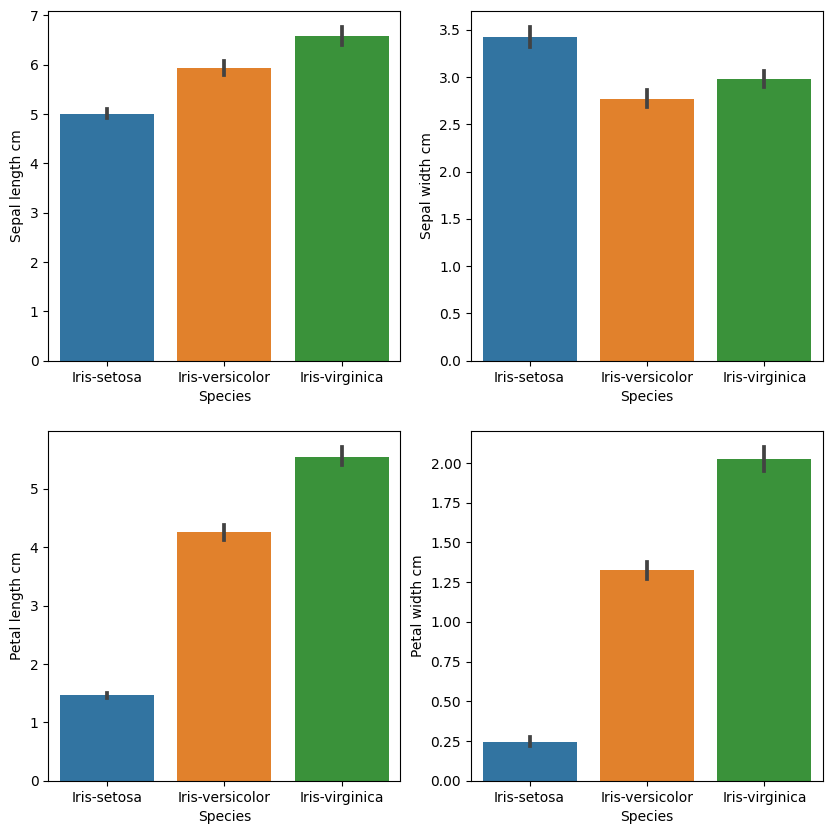

In [22]:
## checking the mean if each feature whue comparing to species
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.barplot(x= df['Species'], y=df['Sepal length cm'])
plt.subplot(2,2,2)
sns.barplot(x= df['Species'], y=df['Sepal width cm'])
plt.subplot(2,2,3)
sns.barplot(x= df['Species'], y=df['Petal length cm'])
plt.subplot(2,2,4)
sns.barplot(x= df['Species'], y=df['Petal width cm'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3840\1041843887.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Petal length cm'])
C:\Users\USER\AppData\Local\Temp\ipykernel_3840\1041843887.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Petal width cm'])
C:\Users\USER\AppData\Local\T

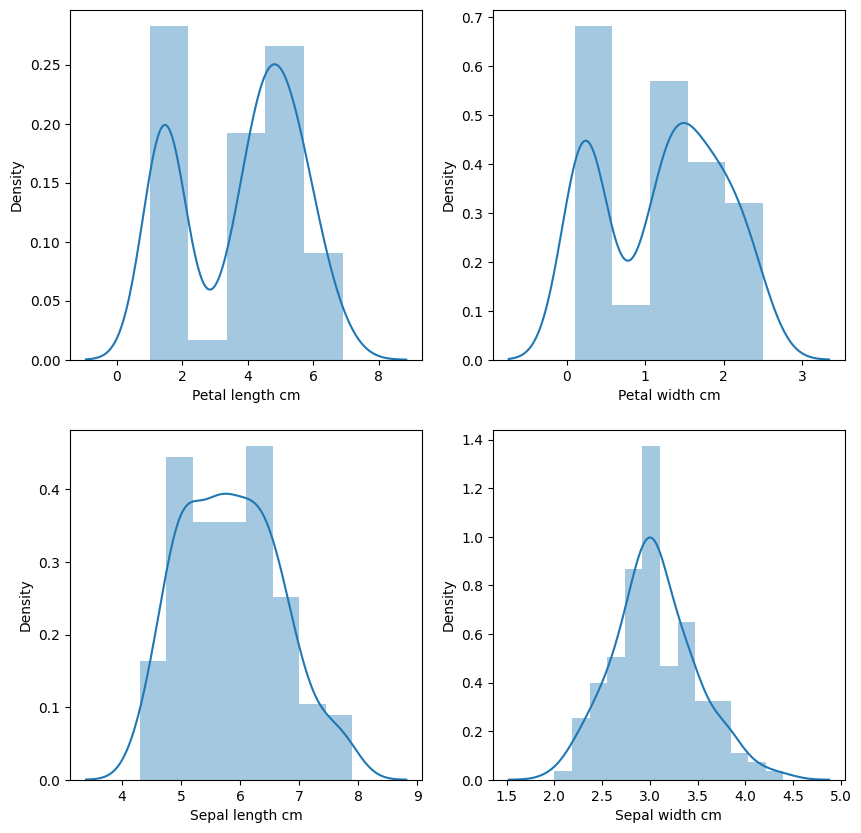

In [24]:
### checkig the distribution of the dataset

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Petal length cm'])
plt.subplot(2,2,2)
sns.distplot(df['Petal width cm'])
plt.subplot(2,2,3)
sns.distplot(df['Sepal length cm'])
plt.subplot(2,2,4)
sns.distplot(df['Sepal width cm'])
plt.show()

In [27]:
## calculating the correlation of the dataset using pearson
data_corr = df.corr(method = 'pearson')
data_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_3840\832395866.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr(method = 'pearson')


,Sepal length cm,Sepal width cm,Petal length cm,Petal width cm
Sepal length cm,1.000000,-0.109369,0.871754,0.817954
Sepal width cm,-0.109369,1.000000,-0.420516,-0.356544
Petal length cm,0.871754,-0.420516,1.000000,0.962757
Petal width cm,0.817954,-0.356544,0.962757,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

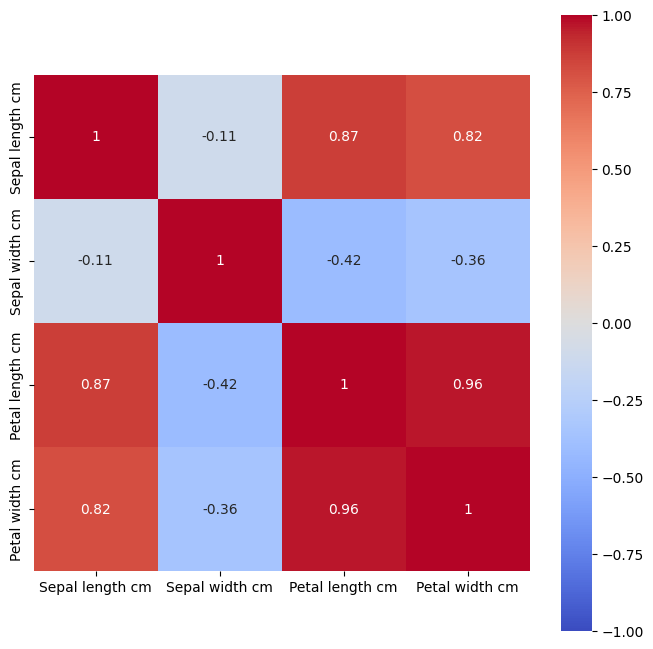

In [38]:
## using heat map to check the correlation
plt.subplots(figsize=(8,8))
sns.heatmap(data_corr, cmap='coolwarm', square = True, annot = True, vmin=-1.0,vmax=1.0, center=0) ### printing the labels of the data in the heatmap
plt.show

## Splitting the dataset

In [56]:
## changing the data type
df['Species'] = df['Species'].astype('category')


In [67]:
## replacing the values in species column
df["Species"] = df["Species"].replace({'Iris-setosa':2,  'Iris-versicolor':1, 'Iris-virginica': 0})


In [68]:
X=df.iloc[:,[0,1,2,3]]
y=df['Species']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, #dependent variables
                                                    y, #independent variable
                                                   random_state = 42,
                                                   test_size = .2, ## the size of the test, .2 means 20 %
                                                   shuffle = True)

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [73]:
score = r2_score(y_test, y_pred)
score

1.0

In [77]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [74]:
reg= LogisticRegression(max_iter=1000)
fit= reg.fit(X_train, y_train)
pred = fit.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

1.0


In [79]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_pred = rf_classifier.predict(X_test)
score = r2_score(y_test, rf_pred)
print(score)

1.0


In [83]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [86]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [87]:
# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_rf.predict(X_test)

In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Random Forest Accuracy:", accuracy)

Best Random Forest Accuracy: 1.0
